<a href="https://colab.research.google.com/github/GR-Tang/IBM-AI0403-Team3/blob/main/Test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the libraries needed for fiddling with the dataset
import pixiedust
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
sns.set_theme(style="darkgrid")

Pixiedust database opened successfully


In [11]:
#importing the necessary libraries for later
!pip install imblearn
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import graphviz

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
#getting the dataset and loading it up
raw_df=pixiedust.sampleData('https://raw.githubusercontent.com/GR-Tang/IBM-AI0403-Team3/main/telco-data.csv')

Downloaded 977501 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/GR-Tang/IBM-AI0403-Team3/main/telco-data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/GR-Tang/IBM-AI0403-Team3/main/telco-data.csv'


In [3]:
#checking and verifying the dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#getting the headers to fiddle with the features
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#one-hot codes in case needed
raw_df['SeniorCitizen']=raw_df['SeniorCitizen'].map({1:'Yes', 0:'No'})
raw_df['MultipleLines']=raw_df['MultipleLines'].map({'Yes':'Yes', 'No':'No','No phone service':'No'})
raw_df['OnlineSecurity']=raw_df['OnlineSecurity'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['OnlineBackup']=raw_df['OnlineBackup'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['DeviceProtection']=raw_df['DeviceProtection'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['TechSupport']=raw_df['TechSupport'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['StreamingTV']=raw_df['StreamingTV'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df['StreamingMovies']=raw_df['StreamingMovies'].map({'Yes':'Yes', 'No':'No','No internet service':'No'})
raw_df=pd.get_dummies(raw_df, columns=['gender','Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], dtype='int64')
#keeping Churn as binary class due to it being target feature
raw_df['Churn']=raw_df['Churn'].map({'Yes': 1, 'No': 0})
raw_df['TotalCharges']=raw_df['TotalCharges'].replace({' ':'0'}).astype(float)
raw_df.drop(columns=['customerID'], inplace = True)

#converting all values yes/no, female/male, etc to binary
raw_df['gender']=raw_df['gender'].map({'Male': 1, 'Female': 0})
raw_df['Partner']=raw_df['Partner'].map({'Yes': 1, 'No': 0})
raw_df['Dependents']=raw_df['Dependents'].map({'Yes': 1, 'No': 0})
raw_df['PhoneService']=raw_df['PhoneService'].map({'Yes': 1, 'No': 0})
raw_df['OnlineSecurity']=raw_df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service':0})
raw_df['OnlineBackup']=raw_df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service':0})
raw_df['DeviceProtection']=raw_df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service':0})
raw_df['TechSupport']=raw_df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service':0})
raw_df['StreamingTV']=raw_df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service':0})
raw_df['StreamingMovies']=raw_df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service':0})
raw_df['PaperlessBilling']=raw_df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
raw_df['Churn']=raw_df['Churn'].map({'Yes': 1, 'No': 0})

#splitting the features from multiclass to binary classification
raw_df['SingleLine']=np.where(raw_df['MultipleLines']=='No', 1, 0).astype("int64")
raw_df['MultipleLines']=raw_df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service':0})
raw_df['FiberOptic']=np.where(raw_df['InternetService']=='Fiber optic', 1, 0).astype("int64")
raw_df['DSL']=np.where(raw_df['InternetService']=='DSL', 1, 0).astype("int64")
raw_df['InternetService']=raw_df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic':1})
raw_df['TwoYearContract']=np.where(raw_df['Contract']=='Two year', 1, 0).astype("int64")
raw_df['OneYearContract']=np.where(raw_df['Contract']=='One year', 1, 0).astype("int64")
raw_df['Contract']=raw_df['Contract'].map({'Month-to-month': 1, 'Two year': 0, 'One year':0})
raw_df['PayByElectronicCheque']=np.where(raw_df['PaymentMethod']=='Electronic check', 1, 0).astype("int64")
raw_df['PayByCC']=np.where(raw_df['PaymentMethod']=='Credit card (automatic)', 1, 0).astype("int64")
raw_df['PayByMailedCheque']=np.where(raw_df['PaymentMethod']=='Mailed check', 1, 0).astype("int64")
raw_df['PaymentMethod']=raw_df['PaymentMethod'].map({'Electronic check': 0, 'Credit card (automatic)': 0, 'Mailed check':0, 'Bank transfer (automatic)':1})
raw_df.rename(columns = {'Contract': 'MonthlyContract', 'PaymentMethod' : 'PayByBankTransfer'}, inplace = True)

#there are 11 null values in Total Charges, inserting 0 for them and changing them to float
raw_df['TotalCharges']=raw_df['TotalCharges'].replace({' ':'0'}).astype(float)

In [6]:
#squarerooting totalcharges and monthly charges for testing purposes to compare effectiveness of bin or sqrt 
raw_df['SqrtMonthlyCharges']=np.sqrt(raw_df['MonthlyCharges']).astype('float')
raw_df['SqrtTotalCharges']=np.sqrt(raw_df['TotalCharges']).astype('float')

In [7]:
#grouping tenure and monthlycharges into bins
raw_df['Bintenure']=(raw_df['tenure']/6).apply(np.ceil).astype("int64")
raw_df['BinMonthlyCharges']=(raw_df['MonthlyCharges']/10).apply(np.ceil).astype("int64")
raw_df['BinTotalCharges']=(raw_df['TotalCharges']/500).apply(np.ceil).astype("int64")

In [8]:
#shifting the target column to position 0 for ease of reference later
churn_df = raw_df['Churn']
raw_df.drop(columns=['Churn'], inplace = True)
raw_df.insert(0, 'Churn', churn_df)

In [9]:
#dropping unwanted columns
raw_df.drop(columns=['gender_Male', 'gender_Female','MonthlyCharges','TotalCharges','tenure'], inplace = True)
backup_raw_df=raw_df
imbaldrop2sqrt_df=raw_df.drop(columns=['BinMonthlyCharges','BinTotalCharges'])
imbaldrop2bin_df=raw_df.drop(columns=['SqrtMonthlyCharges','SqrtTotalCharges'])
imbaldrop7sqrt_df=imbaldrop2sqrt_df.drop(columns=['PhoneService_Yes','PhoneService_No','StreamingTV_Yes','StreamingTV_No','StreamingMovies_Yes','StreamingMovies_No','MultipleLines_Yes','MultipleLines_No','SqrtTotalCharges'])
imbaldrop7bin_df=imbaldrop2bin_df.drop(columns=['PhoneService_Yes','PhoneService_No','StreamingTV_Yes','StreamingTV_No','StreamingMovies_Yes','StreamingMovies_No','MultipleLines_Yes','MultipleLines_No','BinTotalCharges'])

In [ ]:
#PREP FOR IBM WATSON DATASET ONLY, DO NOT RUN
#to export and play with it
raw_df.to_csv("oneHot.csv")
imbaldrop2sqrt_df.to_csv("imbal1hot-drop2withSQRT.csv")
imbaldrop2bin_df.to_csv("imbal1hot-drop2withBIN.csv")
imbaldrop7sqrt_df.to_csv("imbal1hot-drop7withSQRT.csv")
imbaldrop7bin_df.to_csv("imbal1hot-drop7withBIN.csv")

In [12]:
#PREP FOR IBM WATSON DATASET ONLY, DO NOT RUN
#taking 10% of data as test data, the rest to train 
d2btrain_df, d2btest_df = train_test_split(imbaldrop2bin_df, test_size=0.1, stratify=imbaldrop2bin_df['Churn'], random_state=55)
d2strain_df, d2stest_df = train_test_split(imbaldrop2sqrt_df, test_size=0.1, stratify=imbaldrop2sqrt_df['Churn'], random_state=55)
d7btrain_df, d7btest_df = train_test_split(imbaldrop7bin_df, test_size=0.1, stratify=imbaldrop7bin_df['Churn'], random_state=55)
d7strain_df, d7stest_df = train_test_split(imbaldrop7sqrt_df, test_size=0.1, stratify=imbaldrop7sqrt_df['Churn'], random_state=55)

In [13]:
#PREP FOR IBM WATSON DATASET ONLY, DO NOT RUN
pd.value_counts(d7strain_df['Churn'])

0    4656
1    1682
Name: Churn, dtype: int64

In [14]:
#PREP FOR IBM WATSON DATASET ONLY, DO NOT RUN
#oversampling NOTE - Choose the one above or this, do not use both 
sm = SMOTE(sampling_strategy=0.6667, random_state=55)

oversam_train_X, oversam_train_Y = sm.fit_sample(d2btrain_df.drop('Churn', axis=1), d2btrain_df['Churn']) 
d2btrain_df = pd.concat([pd.DataFrame(oversam_train_Y), pd.DataFrame(oversam_train_X)], axis=1)
oversam_train_X, oversam_train_Y = sm.fit_sample(d2strain_df.drop('Churn', axis=1), d2strain_df['Churn']) 
d2strain_df = pd.concat([pd.DataFrame(oversam_train_Y), pd.DataFrame(oversam_train_X)], axis=1)
oversam_train_X, oversam_train_Y = sm.fit_sample(d7btrain_df.drop('Churn', axis=1), d7btrain_df['Churn']) 
d7btrain_df = pd.concat([pd.DataFrame(oversam_train_Y), pd.DataFrame(oversam_train_X)], axis=1)
oversam_train_X, oversam_train_Y = sm.fit_sample(d7strain_df.drop('Churn', axis=1), d7strain_df['Churn']) 
d7strain_df = pd.concat([pd.DataFrame(oversam_train_Y), pd.DataFrame(oversam_train_X)], axis=1)

In [15]:
#PREP FOR IBM WATSON DATASET ONLY, DO NOT RUN
pd.value_counts(d7strain_df['Churn'])

0    4656
1    3104
Name: Churn, dtype: int64

In [16]:
#PREP FOR IBM WATSON DATASET ONLY, DO NOT RUN
#to export and play with it
#raw_df.to_csv("oneHot.csv")
d2btrain_df.to_csv("bal1hot-drop2withSQRT.csv")
d2strain_df.to_csv("bal1hot-drop2withBIN.csv")
d7btrain_df.to_csv("bal1hot-drop7withSQRT.csv")
d7strain_df.to_csv("bal1hot-drop7withBIN.csv")

In [ ]:
#can skip, for visualisation
display(raw_df)

Churn,Partner_No,Partner_Yes,SeniorCitizen_No,SeniorCitizen_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SqrtMonthlyCharges,Bintenure
1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.424882213639254,1.0
1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10.215251632395864,11.0
0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4.449719092257398,7.0
0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.715966241192895,8.0
0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.710818709048171,10.0
0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,7.459892760623306,8.0
0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.4777226354476225,1.0
0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.08959860450355,3.0
0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.4328320518603,1.0
1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.363611660042569,1.0


In [21]:
#noticed target data is imbalanced, we can either undersample (randomly reduce negatives to match the number of positives) 
#or oversample (randomly generate synthetic positives to match the number of negatives)
#however, almost all articles points to balancing after splitting into test/train sets. 
pd.value_counts(raw_df['Churn'])

0    5174
1    1869
Name: Churn, dtype: int64

#can skip, for visualisation
#raw_df.groupby('Churn')[['MonthlyContract', 'OneYearContract', 'TwoYearContract']].sum()
#raw_df.groupby('Churn')[['PhoneService', 'MultipleLines', 'DeviceProtection']].sum()
#raw_df.groupby('Churn')[['InternetService', 'FiberOptic', 'DSL']].sum()
#raw_df.groupby('Churn')[['OnlineSecurity', 'OnlineBackup', 'TechSupport']].sum()
#raw_df.groupby('Churn')[['StreamingTV', 'StreamingMovies']].sum()
#raw_df.groupby('Churn')[['PayByBankTransfer', 'PayByCC', 'PayByElectronicCheque', 'PayByMailedCheque']].sum()

In [20]:
#Selecting the CSV file to use
raw_df=imbaldrop7sqrt_df

In [22]:
#taking 10% of data as test data, the rest to train 
train_df, test_df = train_test_split(raw_df, test_size=0.1, stratify=raw_df['Churn'], random_state=55)

#printing to check size
print("Size of the training dataset = ", train_df.shape)
print("Size of the testing dataset = ", test_df.shape)

#show sample of the dataset to verify
print("\n\nSample of the training dataset \n")
train_df.head()

Size of the training dataset =  (6338, 29)
Size of the testing dataset =  (705, 29)


Sample of the training dataset 



,Churn,Partner_No,Partner_Yes,SeniorCitizen_No,SeniorCitizen_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SqrtMonthlyCharges,Bintenure
766,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,8.879752,4
2054,1,1,0,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,7.028513,1
1039,1,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,8.913473,7
1814,0,0,1,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,1,4.438468,2
1440,0,0,1,1,0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,4.460942,2


In [23]:
pd.value_counts(train_df['Churn'])

0    4656
1    1682
Name: Churn, dtype: int64

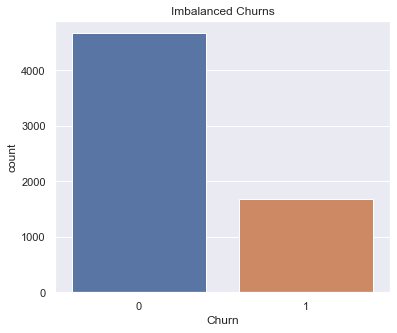

In [24]:
#plot and show the current imbalance
rcParams['figure.figsize'] = 6,5
sns.countplot(x='Churn', data=train_df)
plt.title('Imbalanced Churns')
plt.show()

In [25]:
#undersampling NOTE - Choose the one below or this, do not use both
#shuffle the Dataset. Everyday we're shuffling..shuffling... shuffling... (frac=1 means gimme back all the rows)
shuffled_df = train_df.sample(frac=1,random_state=555)

#pull out all the churn positives
churnPos_df = shuffled_df.loc[shuffled_df['Churn'] == 1]

#randomly pick 1682 rows from the ChurnNegatives (majority)
churnNeg_df = shuffled_df.loc[shuffled_df['Churn'] == 0].sample(n = 1682, random_state = 55)

#joining them back again
train_df = pd.concat([churnNeg_df, churnPos_df])


#oversampling NOTE - Choose the one above or this, do not use both
sm = SMOTE(sampling_strategy='auto', random_state=55)

oversam_train_X, oversam_train_Y = sm.fit_sample(train_df.drop('Churn', axis=1), train_df['Churn'])
train_df = pd.concat([pd.DataFrame(oversam_train_Y), pd.DataFrame(oversam_train_X)], axis=1)

In [26]:
pd.value_counts(train_df['Churn'])

0    1682
1    1682
Name: Churn, dtype: int64

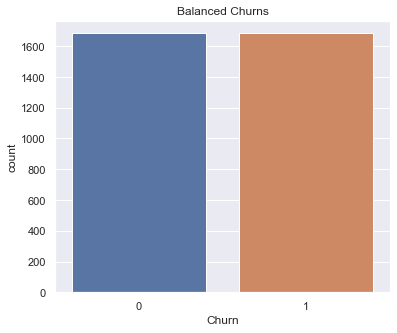

In [27]:
#Now plot and show the corrected balance
rcParams['figure.figsize'] = 6,5
sns.countplot(x='Churn', data=train_df)
plt.title('Balanced Churns')
plt.show()

In [28]:
#define target column for both test and train dataset
train_X, train_Y = train_df.iloc[:,1:],train_df.iloc[:,0]
test_X, test_Y = test_df.iloc[:,1:],test_df.iloc[:,0]

In [29]:
#reading the data in XGB, providing label as needed for Dataframe
dtrain = xgb.DMatrix(data=train_X, label=train_Y)
dtest = xgb.DMatrix(data=test_X, label=test_Y)

In [30]:
#selecting the model, parameters used for the first run is to suppress error messages
model1 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)

In [31]:
#fitting the model to the training dataset
model1.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

#visualising the decision tree for shits and giggles
rcParams['figure.figsize'] = 30,40
xgb.plot_tree(model1, rankdir='LR')
plt.show()

In [32]:
#testing the model with test data (10%) and rounding up probability (not sure if needed)
xgb1_preds = model1.predict(test_X)
xgb1_pred_Y = [round(value) for value in xgb1_preds]

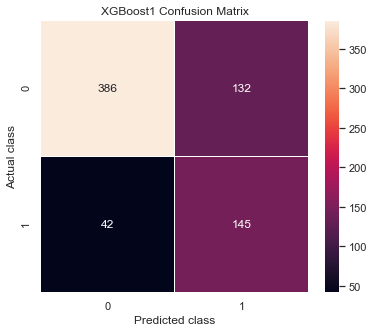

In [33]:
#plotting the confusion matrix, codes shamelessly plucked from challenge lab 2
rcParams['figure.figsize'] = 6,5
fig, ax = plt.subplots()
cm = confusion_matrix(test_Y, xgb1_pred_Y)
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax = ax)
ax.set_title('XGBoost1 Confusion Matrix')
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
plt.show()

In [ ]:
#calculate mean square error, not sure if useful for binary classification, included for fun 
#MSE = np.sqrt(mean_squared_error(test_Y, xgb1_pred_Y))
#print("XGBoost1 MSE: %f" % (MSE))

In [34]:
#use sklearn to evaluate predictions 
#accuracy simply calculates the number of correct predictions and may not be "accurate" (hehe) in cases of class imbalance
accuracy = accuracy_score(test_Y, xgb1_pred_Y)
#calculating the ROC (Receiver Operating Characteristic)
#plotting true positive rates (Recall = TP/(TP+FN)) on Y axis vs false positve (Specificity = FP/(FP+TN)) on X axis) 
#and calculating AUC(Area Under Curve)
xgb1_probs = model1.predict_proba(test_X)
xgb1_probs = xgb1_probs[:, 1]
xgb1_auc = roc_auc_score(test_Y, xgb1_probs)
xgb1_fpr, xgb1_tpr, _ = roc_curve(test_Y, xgb1_probs)
#calculating Precision = (TP/(TP+FP)) and plotting Precision Recall Curve and the AUC
xgb1_precision, xgb1_recall, _ = precision_recall_curve(test_Y, xgb1_probs)
xgb1_f1, xgb1_auc = f1_score(test_Y, xgb1_preds), auc(xgb1_recall, xgb1_precision)
print("XGBoost1 Accuracy: %.2f%%" % (accuracy * 100.0))
print('XGBoost1 Initial: ROC AUC=%.3f' % (xgb1_auc))
print('XGBoost1 Initial: F1=%.3f auc=%.3f' % (xgb1_f1, xgb1_auc))

XGBoost1 Accuracy: 75.32%
XGBoost1 Initial: ROC AUC=0.628
XGBoost1 Initial: F1=0.625 auc=0.628


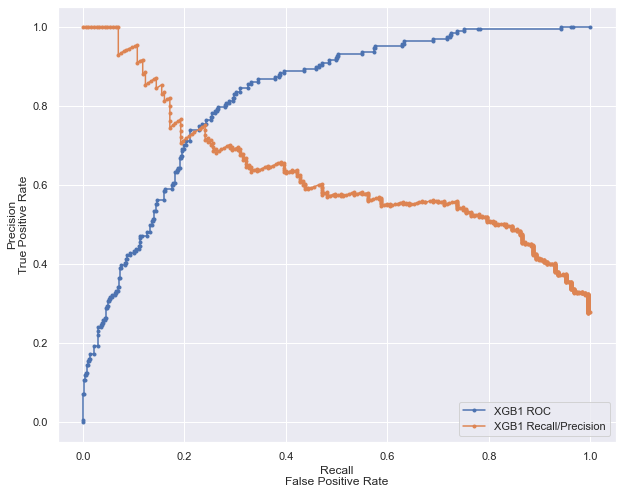

In [35]:
#plotting them both together to make it look more sexy (ooh yea baby)
rcParams['figure.figsize'] = 10,8
plt.plot(xgb1_fpr, xgb1_tpr, marker='.', label='XGB1 ROC')
plt.plot(xgb1_recall, xgb1_precision, marker='.', label='XGB1 Recall/Precision')
plt.xlabel('Recall\nFalse Positive Rate')
plt.ylabel('Precision\nTrue Positive Rate')
plt.legend()
plt.show()

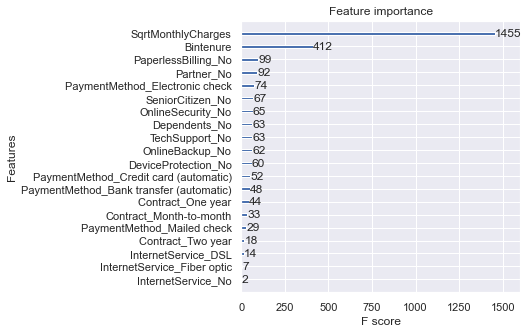

In [36]:
#shows which features are more important. Seriously dont ask me how this command works internally, 
#i'm already swimming in a sea of documentations i need to read up on.
#just take it as a nicely pre-written black box which you throw inputs at it and it'll give you the outputs
rcParams['figure.figsize'] = 5,5
xgb.plot_importance(model1)
plt.show()

In [37]:
#using gridsearchCV to determine best xgboost hyperparameters
model2 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)
eta = [0.03, 0.04, 0.042, 0.044, 0.046, 0.05]
param_grid = dict(eta=eta)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=55)
grid_search = GridSearchCV(model2, param_grid, scoring="roc_auc", cv=kfold)
grid_result = grid_search.fit(train_X, train_Y)

In [38]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("ROC AUC %f (%f) with: %r" % (mean, stdev, param))

Best: 0.831062 using {'eta': 0.03}
ROC AUC 0.831062 (0.008380) with: {'eta': 0.03}
ROC AUC 0.830047 (0.008373) with: {'eta': 0.04}
ROC AUC 0.830491 (0.008284) with: {'eta': 0.042}
ROC AUC 0.830798 (0.008013) with: {'eta': 0.044}
ROC AUC 0.830662 (0.008324) with: {'eta': 0.046}
ROC AUC 0.828995 (0.008838) with: {'eta': 0.05}


# plot
rcParams['figure.figsize'] = 6,6
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs ROC auc")
plt.xlabel('learning_rate')
plt.ylabel('ROC')

In [39]:
#using gridsearchCV to determine best xgboost hyperparameters
model3 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)
min_child_weight = [1, 2, 3, 4, 5, 10]
param_grid = dict(min_child_weight=min_child_weight)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=55)
grid_search = GridSearchCV(model3, param_grid, scoring="roc_auc", cv=kfold)
grid_result = grid_search.fit(train_X, train_Y)

In [40]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("ROC AUC %f (%f) with: %r" % (mean, stdev, param))
#results in a huh???? haha, mark down for now

Best: 0.818555 using {'min_child_weight': 10}
ROC AUC 0.803723 (0.015475) with: {'min_child_weight': 1}
ROC AUC 0.808454 (0.010747) with: {'min_child_weight': 2}
ROC AUC 0.811856 (0.011997) with: {'min_child_weight': 3}
ROC AUC 0.812958 (0.013553) with: {'min_child_weight': 4}
ROC AUC 0.813573 (0.011485) with: {'min_child_weight': 5}
ROC AUC 0.818555 (0.014142) with: {'min_child_weight': 10}


In [41]:
#using gridsearchCV to determine best xgboost hyperparameters
model4 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)
max_depth = [3, 4, 5, 6, 7, 8]
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=55)
grid_search = GridSearchCV(model4, param_grid, scoring="roc_auc", cv=kfold)
grid_result = grid_search.fit(train_X, train_Y)

In [42]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("ROC AUC %f (%f) with: %r" % (mean, stdev, param))

Best: 0.821815 using {'max_depth': 3}
ROC AUC 0.821815 (0.013264) with: {'max_depth': 3}
ROC AUC 0.813734 (0.013126) with: {'max_depth': 4}
ROC AUC 0.808419 (0.013739) with: {'max_depth': 5}
ROC AUC 0.803723 (0.015475) with: {'max_depth': 6}
ROC AUC 0.799634 (0.013721) with: {'max_depth': 7}
ROC AUC 0.799006 (0.010683) with: {'max_depth': 8}


In [43]:
#using gridsearchCV to determine best xgboost hyperparameters
model5 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0)
gamma = [7, 8, 9, 10, 11, 12]
param_grid = dict(gamma=gamma)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=55)
grid_search = GridSearchCV(model5, param_grid, scoring="roc_auc", cv=kfold)
grid_result = grid_search.fit(train_X, train_Y)

In [44]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("ROC AUC %f (%f) with: %r" % (mean, stdev, param))

Best: 0.835401 using {'gamma': 8}
ROC AUC 0.834759 (0.008759) with: {'gamma': 7}
ROC AUC 0.835401 (0.007827) with: {'gamma': 8}
ROC AUC 0.835298 (0.006836) with: {'gamma': 9}
ROC AUC 0.835161 (0.008897) with: {'gamma': 10}
ROC AUC 0.835376 (0.008739) with: {'gamma': 11}
ROC AUC 0.835036 (0.008351) with: {'gamma': 12}


In [52]:
#Refit the model with new optimised parameters
model6 = xgb.XGBClassifier(use_label_encoder=False, verbosity=0, eta=0.04, min_child_weight=2, max_depth=4, gamma=8)

In [53]:
#fitting the model to the training dataset
model6.fit(train_X, train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.04, gamma=8,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0399999991, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [54]:
#testing the model with test data (10%) and rounding up probability (not sure if needed)
xgb2_preds = model6.predict(test_X)
xgb2_pred_Y = [round(value) for value in xgb2_preds]

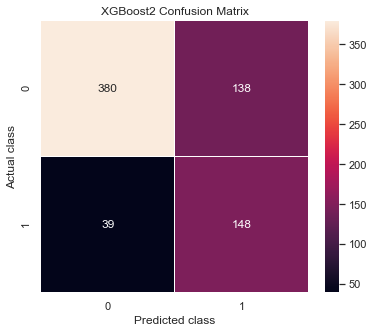

In [55]:
#plotting the confusion matrix, codes shamelessly plucked from challenge lab 2
rcParams['figure.figsize'] = 6,5
fig, ax = plt.subplots()
cm = confusion_matrix(test_Y, xgb2_pred_Y)
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax = ax)
ax.set_title('XGBoost2 Confusion Matrix')
ax.set_xlabel("Predicted class")
ax.set_ylabel("Actual class")
plt.show()

In [56]:
#use sklearn to evaluate predictions 
#accuracy simply calculates the number of correct predictions and may not be "accurate" (hehe) in cases of class imbalance
accuracy = accuracy_score(test_Y, xgb2_pred_Y)
#calculating the ROC (Receiver Operating Characteristic)
#plotting true positive rates (Recall = TP/(TP+FN)) on Y axis vs false positve (Specificity = FP/(FP+TN)) on X axis) 
#and calculating AUC(Area Under Curve)
xgb2_probs = model6.predict_proba(test_X)
xgb2_probs = xgb2_probs[:, 1]
xgb2_auc = roc_auc_score(test_Y, xgb2_probs)
xgb2_fpr, xgb2_tpr, _ = roc_curve(test_Y, xgb2_probs)
#calculating Precision = (TP/(TP+FP)) and plotting Precision Recall Curve and the AUC
xgb2_precision, xgb2_recall, _ = precision_recall_curve(test_Y, xgb2_probs)
xgb2_f1, xgb2_auc = f1_score(test_Y, xgb2_preds), auc(xgb2_recall, xgb2_precision)
print("XGBoost2 Accuracy: %.2f%%" % (accuracy * 100.0))
print('XGBoost2 ROC AUC=%.3f' % (xgb2_auc))
print('XGBoost2 F1=%.3f auc=%.3f' % (xgb2_f1, xgb2_auc))

XGBoost2 Accuracy: 74.89%
XGBoost2 ROC AUC=0.669
XGBoost2 F1=0.626 auc=0.669


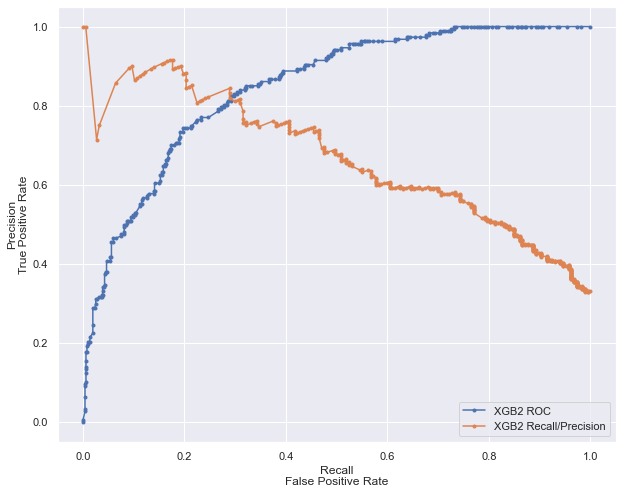

In [57]:
#plotting them both together to make it look more sexy (ooh yea baby)
rcParams['figure.figsize'] = 10,8
plt.plot(xgb2_fpr, xgb2_tpr, marker='.', label='XGB2 ROC')
plt.plot(xgb2_recall, xgb2_precision, marker='.', label='XGB2 Recall/Precision')
plt.xlabel('Recall\nFalse Positive Rate')
plt.ylabel('Precision\nTrue Positive Rate')
plt.legend()
plt.show()

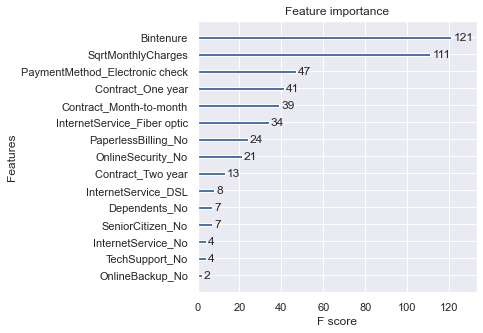

In [58]:
#shows which features are more important. Seriously dont ask me how this command works internally, 
#i'm already swimming in a sea of documentations i need to read up on.
#just take it as a nicely pre-written black box which you throw inputs at it and it'll give you the outputs
rcParams['figure.figsize'] = 5,5
xgb.plot_importance(model6)
plt.show()

#Prep for deployment
#IMPORTANT - READ BELOW:
#IMPORTANT - ALL CODES BELOW ARE FOR TECH DEMONSTRATION ONLY, DO NOT RUN. CELLS WILL BE MARK DOWN IN FUTURE VERSIONS.
#IMPORTANT - READ ABOVE
#!pip install ibm-watson-machine-learning
from ibm_watson_machine_learning import APIClient

#creating the login credentials and getting the IAM token from IBM Cloud
# @hidden_cell
api_key = "<removed>"
wml_credentials = {
    "apikey": api_key,
    "url": 'https://us-south.ml.cloud.ibm.com'
}
client = APIClient(wml_credentials)

#getting the list of spaces available on my cloud account
client.spaces.list()

#setting the space this client will be working on
client.set.default_space("163085a0-83fa-4fed-8c4e-07e486aa743c")

#verifying my own system environment
import sys
sys.version

#checking my package version
xgb.__version__

#getting a list of software specifications available on IBM cloud 
#do note that it's not fantastically compatible, maybe coz i'm on still a free account 
#free stuff is good stuff, at least for learning purposes
client.software_specifications.list()

#Storing the trained model in the cloud space together with the training data 
metadata = {
    client.repository.ModelMetaNames.NAME: 'Telco Churn Prediction Model',
    client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.22',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: "154010fa-5b3b-4ac1-82af-4d5ee5abbc85"
}
published_model = client.repository.store_model(
    model=model1,
    meta_props=metadata,
    training_data=train_X,
    training_target=train_Y)

#listing the stored model(s) in my repository
models_details = client.repository.list_models()

#selecting the stored model by UID and deploying it online
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of Telco Churn Prediction Model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create("8597546e-fac9-4cc4-99e0-ae5646f586cc", meta_props=metadata)

#listing the instances of deployed models
client.deployments.list()

#dumping some numbers into the deployed model for predictions
scoring_payload = {"input_data": [{"values": [[0,0,0,0,3,1,1,1,0,0,1,1,1,1,1,0,10,50,1,1,0,0,0,1,0,0]]}]}
predictions = client.deployments.score("7c6da0f0-ed51-4c0d-8434-0594b3024ca7", scoring_payload)